In [12]:
!ls

Clear				       Res_Acryl_lens_12.5_F8.txt
clear_data.awk			       results_light_collector_big_final.txt
Data				       results_only_SiPM_1.txt
Figs				       results_only_SiPM_final.dat
init.ipynb			       results_only_SiPM_final.txt
my_input_modulo.py		       Servo_stand
Proba.ipynb			       Servo_stend-2.ipynb
__pycache__			       Servo_stend.ipynb
README.md			       Servo_stend_run_only.ipynb
Res_Acryl_lens_12.5_F8_no_contact.txt


In [2]:
%matplotlib inline
## Подключение библиотек
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib
import matplotlib.gridspec as gridspec
import warnings
## Настройки для графиков
plt.rcParams['figure.figsize'] = (8,6)
plt.rcParams['lines.markersize'] = 3
plt.rcParams['lines.markeredgewidth'] = 1
plt.rcParams['lines.linewidth'] = 2
plt.rcParams['grid.alpha'] = 0.7
plt.rcParams['xtick.direction'] = 'in'
plt.rcParams['ytick.direction'] = 'in'
plt.rcParams['font.size'] = 14

   No    t[s]    T[C]  U+_SiPM[V]  U-_SiPM[V]  Vert.angl[grad].  \
0   1  13.599  21.506       3.289     -23.715                90   
1   2  15.604  21.400       3.289     -23.713                90   

   Hor.angl[grad]  I_SiPM[uA]  I0_SiPM[uA]  I_SiPM_uA  
0               0       0.622        0.596      0.026  
1               2       0.651        0.593      0.058  
[90, 120, 135, 150, 180]
     Hor_ang     90    120    135    150    180
0          0  0.026  0.028  0.056  0.045  0.043
1          2  0.058  0.034  0.099  0.002  0.041
2          4  0.058  0.019  0.051 -0.020  0.032
3          6  0.047  0.040  0.098  0.022  0.012
4          8  0.023  0.072  0.040  0.043  0.020
..       ...    ...    ...    ...    ...    ...
176        8  0.062  0.049  0.070  0.062  0.021
177        6  0.042 -0.015  0.058  0.020  0.006
178        4  0.017  0.053  0.069  0.019  0.035
179        2 -0.020  0.018  0.074  0.028  0.032
180        0  0.084 -0.005 -0.032  0.048 -0.031

[181 rows x 6 columns]


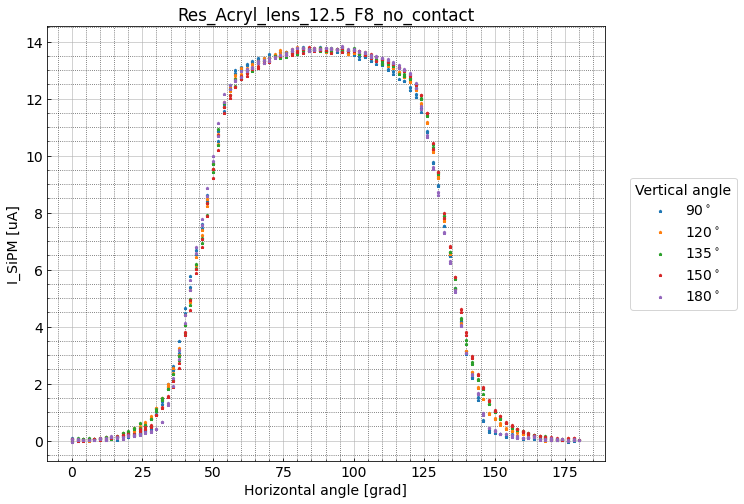

In [17]:
# read clear data file to pandas dataframe
def clear_read_and_plot(filen):
    filename = './Clear/clear_' + filen
    datum = pd.read_csv(filename, index_col=False, sep='\s+', skiprows=10)
    datum["I_SiPM_uA"] = datum["I_SiPM[uA]"] - datum["I0_SiPM[uA]"]
    print(datum.head(2))

    ## plot horizontal angle distributions
    fig, axn = plt.subplots(figsize=(10, 8))
    grads = sorted([x[0] for x in datum["Vert.angl[grad]."].value_counts().items()])
    print(grads)
    for grad in grads:
        data = datum[datum["Vert.angl[grad]."] == grad] 
        ax = "Hor.angl[grad]"
        ## вычитаем пьедестал по току
        yy = data["I_SiPM[uA]"] - data ["I0_SiPM[uA]"]
        plt.plot(data[ax], yy, '*', label=str(grad)+'$^\circ$')
    # Легенда, оси, заголовок
    plt.legend(loc="center right", bbox_to_anchor=(1.25,0.5),
                title="Vertical angle")
    plt.xlabel("Horizontal angle [grad]")
    plt.ylabel("I_SiPM [uA]")
    plt.title(filen[:-4])
    # сетка
    plt.minorticks_on()
    plt.grid()
    # Внешний вид линий вспомогательной сетки:
    plt.grid(which='minor', color = 'k', linestyle = ':')


    data = datum[datum["Vert.angl[grad]."] == grads[0]]
    newdata = data[['Hor.angl[grad]','I_SiPM_uA']][:181]
    newdata.rename(columns = {'I_SiPM_uA':grads[0], 'Hor.angl[grad]':'Hor_ang'}, inplace = True) 
    for grad in grads[1:]:
        data = datum[datum["Vert.angl[grad]."] == grad] 
        newdata[grad] = data['I_SiPM_uA'].tolist()
    print(newdata)
    newdata.to_csv("Data_to_fit/" + filen[:-3] + "dat", float_format="%.3f", sep='\t')

   

#clear_read_and_plot("results_only_SiPM_final.txt")  
clear_read_and_plot("Res_Acryl_lens_12.5_F8_no_contact.txt")

        No      t[s]    T[C]  U+_SiPM[V]  U-_SiPM[V]  Vert.angl[grad].  \
0        1    13.677  22.278       3.289     -23.714                90   
1        2    15.686  22.233       3.289     -23.713                90   
2        3    17.687  22.253       3.289     -23.713                90   
3        4    19.692  22.203       3.289     -23.711                90   
4        5    21.701  22.170       3.289     -23.712                90   
...    ...       ...     ...         ...         ...               ...   
1986  1987  4092.546  21.906       3.289     -23.722                90   
1987  1988  4094.546  21.869       3.288     -23.724                90   
1988  1989  4096.547  21.868       3.288     -23.718                90   
1989  1990  4098.547  21.844       3.289     -23.719                90   
1990  1991  4100.547  21.915       3.289     -23.721                90   

      Hor.angl[grad]  I_SiPM[uA]  I0_SiPM[uA]  
0                  0       0.675        0.644  
1              

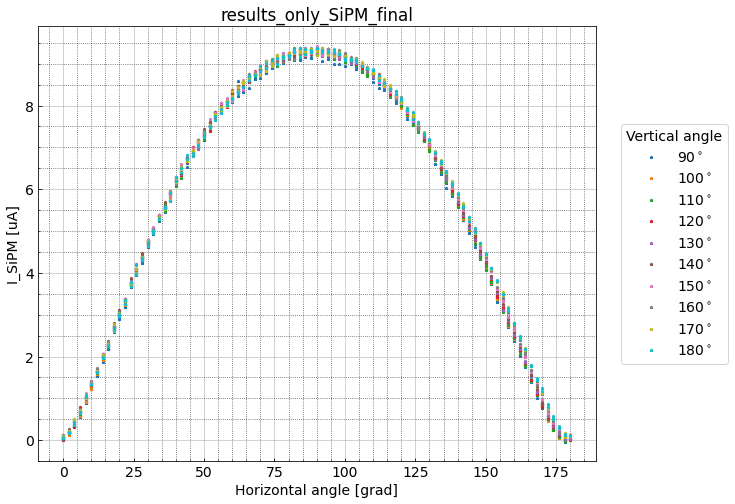

In [ ]:
clear_read_and_plot("results_only_SiPM_final.txt")

In [4]:
newdata

NameError: name 'newdata' is not defined

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=29d69147-c483-44f1-9c27-9c61510e33f7' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>